In [396]:
import numpy as np
import math
import matplotlib.pyplot as plt 

# Velocity field calculation

In [397]:
def get_ux(T,x,y,x0,y0):
    ux = -(T*(y-y0))/(2*(math.pi)*((x-x0)**2+(y-y0)**2))
    return ux

In [398]:
def get_uy(T,x,y,x0,y0):
    uy = (T*(x-x0))/(2*(math.pi)*((x-x0)**2+(y-y0)**2))
    return uy

# Euler

In [399]:
x1=x01=0.5
y1=y01=0
x2=x02=-0.5
y2=y02=0
#initial position

In [400]:
#arrays for storing coordinates
x_pos1 = np.array([0.5])
y_pos1 = np.array([0]) 
x_pos2 = np.array([-0.5]) 
y_pos2 = np.array([0]) 

In [401]:
def euler(x,v,dt):
    x1 = x + v*dt
    return x1                     #dt is timestep
dt = 0.01
for t in range(0,3000,1):
    u1 = get_ux(1,x1,y1,x02,y02)
    v1 = get_uy(1,x1,y1,x02,y02)
    #x1 = x1 + u1*0.01
    x1 = euler(x1,u1,dt)
    x_pos1 = np.append(x_pos1,x1)
    #y1 = y1 + v1*0.01
    y1 = euler(y1,v1,dt)
    y_pos1 = np.append(y_pos1,y1)

    u2 = get_ux(1,x2,y2,x01,y01)
    v2 = get_uy(1,x2,y2,x01,y01)
    #x2 = x2 + u2*0.01
    x2 = euler(x2,u2,dt)
    x_pos2 = np.append(x_pos2,x2)
    #y2 = y2 + v2*0.01
    y2 = euler(y2,v2,dt)
    y_pos2 = np.append(y_pos2,y2)

    x01=x1
    y01=y1
    x02=x2
    y02=y2

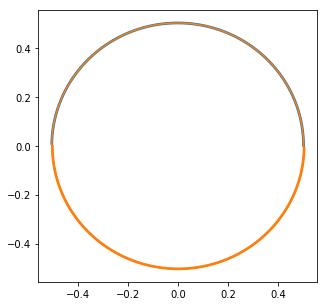

In [402]:
plt.figure(figsize=(5,5))

plt.plot(x_pos1,y_pos1)
plt.plot(x_pos2,y_pos2)                   #solution should be circle around origin

# RK2

In [403]:
def RK2(x,v_j,v_j1,dt):
    x_j1 = x + dt*(v_j+v_j1)/2                 #xj+1 = xj + (vj+v(j+1))*dt/2
    return x_j1

In [404]:
x1=x01=0.5
y1=y01=0
x2=x02=-0.5
y2=y02=0

In [405]:
x_pos1 = np.array([0.5])
y_pos1 = np.array([0]) 
x_pos2 = np.array([-0.5]) 
y_pos2 = np.array([0]) 

In [406]:
dt = 0.01
for t in range(0,30000,1):
    #vortex1
    u1 = get_ux(1,x1,y1,x02,y02)                #velocities at initial positions
    v1 = get_uy(1,x1,y1,x02,y02)
    xj1 = euler(x1,u1,dt)                     #x_j+1 coordiante using euler
    yj1 = euler(y1,v1,dt)
    
    #vortex2
    u2 = get_ux(1,x2,y2,x01,y01)
    v2 = get_uy(1,x2,y2,x01,y01)
    xj2 = euler(x2,u2,dt)
    yj2 = euler(y2,v2,dt)
    
    uj1 = get_ux(1,xj1,yj1,xj2,yj2)             #v_j+1 using euler
    vj1 = get_uy(1,xj1,yj1,xj2,yj2)
    uj2 = get_ux(1,xj2,yj2,xj1,yj1)
    vj2 = get_uy(1,xj2,yj2,xj1,yj1)
    
    dt = 0.01
    x1 = RK2(x1,u1,uj1,dt)                        #coordinates after dt time using RK2
    x_pos1 = np.append(x_pos1,x1)
    y1 = RK2(y1,v1,vj1,dt)
    y_pos1 = np.append(y_pos1,y1)
    
    x2 = RK2(x2,u2,uj2,dt)
    x_pos2 = np.append(x_pos2,x2)
    y2 = RK2(y2,v2,vj2,dt)
    y_pos2 = np.append(y_pos2,y2)
    
    x01=x1
    y01=y1
    x02=x2
    y02=y2  

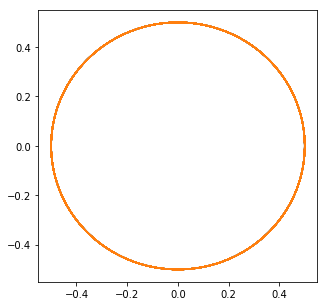

In [407]:
plt.figure(figsize=(5,5))
plt.plot(x_pos1,y_pos1)
plt.plot(x_pos2,y_pos2)
                                                         #exact solution is circle around origin

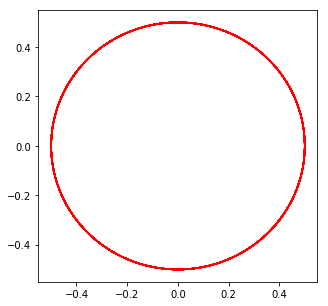

In [408]:
plt.figure(figsize=(5,5))

plt.plot(x_pos2,y_pos2,"r")


# eq. triangle


In [409]:
def RK2(x,v_j,v_j1,dt):
    x_j1 = x + dt*(v_j+v_j1)/2
    return x_j1

In [410]:
x1=x01=-0.5
y1=y01=0
x2=x02=0.5
y2=y02=0
x3=x03=0
y3=y03=(math.sqrt(3)/2)

In [411]:
#arrays for storing coordinates
x_pos1 = np.array([-0.5])
y_pos1 = np.array([0]) 
x_pos2 = np.array([0.5]) 
y_pos2 = np.array([0]) 
x_pos3 = np.array([0])
y_pos3 = np.array([math.sqrt(3)/2])

In [412]:
for t in range(0,3000,1):
    dt = 0.01
    u1 = get_ux(1,x1,y1,x02,y02) + get_ux(1,x1,y1,x03,y03)    #vortex1: calcualtion of velocity(vj)
    v1 = get_uy(1,x1,y1,x02,y02) + get_uy(1,x1,y1,x03,y03)
    xj1 = euler(x1,u1,dt)                                     #calculation of xj+1 using euler
    yj1 = euler(y1,v1,dt)

    u2 = get_ux(1,x2,y2,x01,y01) + get_ux(1,x2,y2,x03,y03)     #vortex2: calcualtion of velocity(vj)
    v2 = get_uy(1,x2,y2,x01,y01) + get_uy(1,x2,y2,x03,y03)
    xj2 = euler(x2,u2,dt)                                       #calculation of xj+1 using euler
    yj2 = euler(y2,v2,dt)
    
    u3 = get_ux(1,x3,y3,x01,y01) + get_ux(1,x3,y3,x02,y02)     #vortex3: calcualtion of velocity(vj)
    v3 = get_uy(1,x3,y3,x01,y01) + get_uy(1,x3,y3,x02,y02)
    xj3 = euler(x3,u3,dt)                                       #calculation of xj+1 using euler
    yj3 = euler(y3,v3,dt)
    
    uj1 = get_ux(1,xj1,yj1,xj2,yj2) + get_ux(1,xj1,yj1,xj3,yj3)
    vj1 = get_uy(1,xj1,yj1,xj2,yj2) + get_uy(1,xj1,yj1,xj3,yj3)
    uj2 = get_ux(1,xj2,yj2,xj1,yj1) + get_ux(1,xj2,yj2,xj3,yj3)    #vJ+1 using euler for all vortices
    vj2 = get_uy(1,xj2,yj2,xj1,yj1) + get_uy(1,xj2,yj2,xj3,yj3)
    uj3 = get_ux(1,xj3,yj3,xj1,yj1) + get_ux(1,xj3,yj3,xj2,yj2)
    vj3 = get_uy(1,xj3,yj3,xj1,yj1) + get_uy(1,xj3,yj3,xj2,yj2)
    
    #xj+1 using RK2 and store coordinates
    x1 = RK2(x1,u1,uj1,dt)
    x_pos1 = np.append(x_pos1,x1)
    y1 = RK2(y1,v1,vj1,dt)
    y_pos1 = np.append(y_pos1,y1)
    
    x2 = RK2(x2,u2,uj2,dt)
    x_pos2 = np.append(x_pos2,x2)
    y2 = RK2(y2,v2,vj2,dt)
    y_pos2 = np.append(y_pos2,y2)
    
    x3 = RK2(x3,u3,uj3,dt)
    x_pos3 = np.append(x_pos3,x3)
    y3 = RK2(y3,v3,vj3,dt)
    y_pos3 = np.append(y_pos3,y3)
    
    
    x01=x1
    y01=y1
    x02=x2
    y02=y2
    x03=x3
    y03=y3

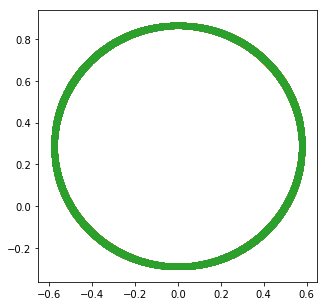

In [413]:
plt.figure(figsize=(5,5))
plt.scatter(x_pos1,y_pos1)
plt.scatter(x_pos2,y_pos2)
plt.scatter(x_pos3,y_pos3)
                                                 #exact solution: all three points make a circle around centroid

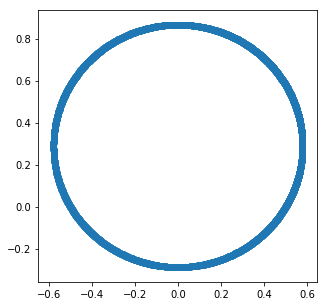

In [414]:
plt.figure(figsize=(5,5))
plt.scatter(x_pos2,y_pos2)

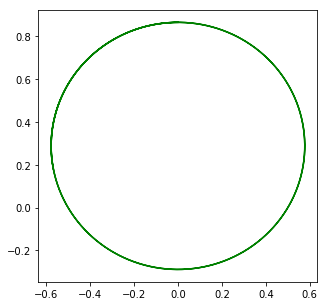

In [415]:
plt.figure(figsize=(5,5))

plt.plot(x_pos3,y_pos3,"g")

# One tracer with three vortices on equilateral triangle

In [416]:
def RK2(x,v_j,v_j1,dt):
    x_j1 = x + dt*(v_j+v_j1)/2
    return x_j1

In [417]:
x1=x01=-0.5
y1=y01=0
x2=x02=0.5
y2=y02=0
x3=x03=0
y3=y03=(math.sqrt(3)/2)
xt=0
yt=0
#initial conditions

In [418]:
#arrays for storing coordinates
x_pos1 = np.array([-0.5])
y_pos1 = np.array([0]) 
x_pos2 = np.array([0.5]) 
y_pos2 = np.array([0]) 
x_pos3 = np.array([0])
y_pos3 = np.array([math.sqrt(3)/2])
x_tracer = np.array([0])
y_tracer = np.array([0])

In [419]:
dt = 0.01
for t in range(0,10000,1):
    u1 = get_ux(1,x1,y1,x02,y02) + get_ux(1,x1,y1,x03,y03)
    v1 = get_uy(1,x1,y1,x02,y02) + get_uy(1,x1,y1,x03,y03)
    xj1 = euler(x1,u1,dt)
    yj1 = euler(y1,v1,dt)

    u2 = get_ux(1,x2,y2,x01,y01) + get_ux(1,x2,y2,x03,y03)
    v2 = get_uy(1,x2,y2,x01,y01) + get_uy(1,x2,y2,x03,y03)
    xj2 = euler(x2,u2,dt)
    yj2 = euler(y2,v2,dt)
    
    u3 = get_ux(1,x3,y3,x01,y01) + get_ux(1,x3,y3,x02,y02)
    v3 = get_uy(1,x3,y3,x01,y01) + get_uy(1,x3,y3,x02,y02)
    xj3 = euler(x3,u3,dt)
    yj3 = euler(y3,v3,dt)
    
    uj1 = get_ux(1,xj1,yj1,xj2,yj2) + get_ux(1,xj1,yj1,xj3,yj3)
    vj1 = get_uy(1,xj1,yj1,xj2,yj2) + get_uy(1,xj1,yj1,xj3,yj3)
    uj2 = get_ux(1,xj2,yj2,xj1,yj1) + get_ux(1,xj2,yj2,xj3,yj3)
    vj2 = get_uy(1,xj2,yj2,xj1,yj1) + get_uy(1,xj2,yj2,xj3,yj3)
    uj3 = get_ux(1,xj3,yj3,xj1,yj1) + get_ux(1,xj3,yj3,xj2,yj2)
    vj3 = get_uy(1,xj3,yj3,xj1,yj1) + get_uy(1,xj3,yj3,xj2,yj2)
    
    #tracer:
    ut = get_ux(1,xt,yt,x02,y02) + get_ux(1,xt,yt,x03,y03) + get_ux(1,xt,yt,x01,y01)
    vt = get_uy(1,xt,yt,x02,y02) + get_uy(1,xt,yt,x03,y03) + get_uy(1,xt,yt,x01,y01)
    xt1 = euler(xt,ut,dt)
    yt1 = euler(yt,vt,dt)
    ujt = get_ux(1,xt1,yt1,xj2,yj2) + get_ux(1,xt1,yt1,xj3,yj3) + get_ux(1,xt1,yt1,xj1,yj1)
    vjt = get_uy(1,xt1,yt1,xj2,yj2) + get_uy(1,xt1,yt1,xj3,yj3) + get_uy(1,xt1,yt1,xj1,yj1)

    
    x1 = RK2(x1,u1,uj1,dt)
    x_pos1 = np.append(x_pos1,x1)
    y1 = RK2(y1,v1,vj1,dt)
    y_pos1 = np.append(y_pos1,y1)
    
    x2 = RK2(x2,u2,uj2,dt)
    x_pos2 = np.append(x_pos2,x2)
    y2 = RK2(y2,v2,vj2,dt)
    y_pos2 = np.append(y_pos2,y2)
    
    x3 = RK2(x3,u3,uj3,dt)
    x_pos3 = np.append(x_pos3,x3)
    y3 = RK2(y3,v3,vj3,dt)
    y_pos3 = np.append(y_pos3,y3)
    
    xt = RK2(xt,ut,ujt,dt)
    x_tracer = np.append(x_tracer,xt)
    yt = RK2(yt,vt,vjt,dt)
    y_tracer = np.append(y_tracer,yt)

    
    
    
    x01=x1
    y01=y1
    x02=x2
    y02=y2
    x03=x3
    y03=y3

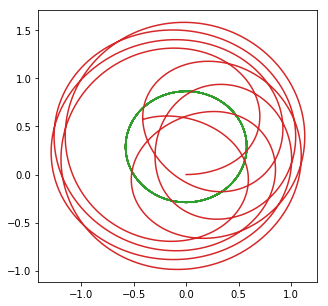

In [420]:
plt.figure(figsize = (5,5))
plt.plot(x_pos1,y_pos1)
plt.plot(x_pos2,y_pos2)
plt.plot(x_pos3,y_pos3)
plt.plot(x_tracer,y_tracer)

# 10 tracer's with three vortices placed on equilateral triangle


In [421]:
def RK2(x,v_j,v_j1,dt):
    x_j1 = x + dt*(v_j+v_j1)/2
    return x_j1

In [422]:
x1=x01=-0.5
y1=y01=0
x2=x02=0.5
y2=y02=0
x3=x03=0
y3=y03=(math.sqrt(3)/2)
xt = {}
yt = {}
for i in range(10):                              #initial positions for tracer's
    xt[i] = 2*i
    
    yt[i] = 0
#initial conditions

In [423]:
#arrays for storing coordinates of vortices and tracer's
x_pos1 = np.array([-0.5])
y_pos1 = np.array([0]) 
x_pos2 = np.array([0.5]) 
y_pos2 = np.array([0]) 
x_pos3 = np.array([0])
y_pos3 = np.array([math.sqrt(3)/2])
x_tracer = {}
y_tracer = {}
for i in range(10):
    x_tracer[i] = [2*i]
    y_tracer[i] = [0]


In [424]:
dt = 0.1
for t in range(0,10000,1):
    u1 = get_ux(1,x1,y1,x02,y02) + get_ux(1,x1,y1,x03,y03)        #vortex1: calcualtion of velocity
    v1 = get_uy(1,x1,y1,x02,y02) + get_uy(1,x1,y1,x03,y03)
    xj1 = euler(x1,u1,dt)                                       #calculation of xj+1 using euler
    yj1 = euler(y1,v1,dt)

    u2 = get_ux(1,x2,y2,x01,y01) + get_ux(1,x2,y2,x03,y03)       #vortex2: calcualtion of velocity
    v2 = get_uy(1,x2,y2,x01,y01) + get_uy(1,x2,y2,x03,y03)
    xj2 = euler(x2,u2,dt)
    yj2 = euler(y2,v2,dt)
    
    u3 = get_ux(1,x3,y3,x01,y01) + get_ux(1,x3,y3,x02,y02)        #vortex1: calcualtion of velocity
    v3 = get_uy(1,x3,y3,x01,y01) + get_uy(1,x3,y3,x02,y02)
    xj3 = euler(x3,u3,dt)                                       #calculation of xj+1 using euler
    yj3 = euler(y3,v3,dt)
    
    uj1 = get_ux(1,xj1,yj1,xj2,yj2) + get_ux(1,xj1,yj1,xj3,yj3)
    vj1 = get_uy(1,xj1,yj1,xj2,yj2) + get_uy(1,xj1,yj1,xj3,yj3)
    uj2 = get_ux(1,xj2,yj2,xj1,yj1) + get_ux(1,xj2,yj2,xj3,yj3)          #vJ+1 using euler for all vortices
    vj2 = get_uy(1,xj2,yj2,xj1,yj1) + get_uy(1,xj2,yj2,xj3,yj3)
    uj3 = get_ux(1,xj3,yj3,xj1,yj1) + get_ux(1,xj3,yj3,xj2,yj2)
    vj3 = get_uy(1,xj3,yj3,xj1,yj1) + get_uy(1,xj3,yj3,xj2,yj2)
    #tracer's 
    for i in range(10):
        #calulation of vj for all tracer's
        ut = get_ux(1,float(xt[i]),float(yt[i]),x02,y02) + get_ux(1,float(xt[i]),float(yt[i]),x03,y03) + get_ux(1,float(xt[i]),float(yt[i]),x01,y01)
        vt = get_uy(1,xt[i],yt[i],x02,y02) + get_uy(1,xt[i],yt[i],x03,y03) + get_uy(1,xt[i],yt[i],x01,y01)
        #calculation of xj+1 using euler
        xt1 = euler(xt[i],ut,dt)
        yt1 = euler(yt[i],vt,dt)
        #vj+1 using euler 
        ujt = get_ux(1,xt1,yt1,xj2,yj2) + get_ux(1,xt1,yt1,xj3,yj3) + get_ux(1,xt1,yt1,xj1,yj1)
        vjt = get_uy(1,xt1,yt1,xj2,yj2) + get_uy(1,xt1,yt1,xj3,yj3) + get_uy(1,xt1,yt1,xj1,yj1)
        
        #xj+1 using RK2
        xt[i] = RK2(xt[i],ut,ujt,dt)
        x_tracer[i].append(xt[i])           #upadate coordinates and store in array
        yt[i] = RK2(yt[i],vt,vjt,dt)
        y_tracer[i].append(yt[i])

        

    #xj+1 using RK2 and store coordinates
    x1 = RK2(x1,u1,uj1,dt)
    x_pos1 = np.append(x_pos1,x1)
    y1 = RK2(y1,v1,vj1,dt)
    y_pos1 = np.append(y_pos1,y1)
    
    x2 = RK2(x2,u2,uj2,dt)
    x_pos2 = np.append(x_pos2,x2)
    y2 = RK2(y2,v2,vj2,dt)
    y_pos2 = np.append(y_pos2,y2)
    
    x3 = RK2(x3,u3,uj3,dt)
    x_pos3 = np.append(x_pos3,x3)
    y3 = RK2(y3,v3,vj3,dt)
    y_pos3 = np.append(y_pos3,y3)
    
    
    
    
    x01=x1
    y01=y1
    x02=x2
    y02=y2
    x03=x3
    y03=y3

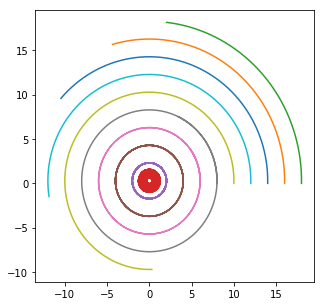

In [425]:
plt.figure(figsize=(5,5))
plt.plot(x_pos1,y_pos1)
plt.plot(x_pos2,y_pos2)
plt.plot(x_pos3,y_pos3)
for i in range(10):
    plt.plot(x_tracer[i],y_tracer[i])

# Three points on isosceles triangle

In [426]:
def RK2(x,v_j,v_j1,dt):
    x_j1 = x + dt*(v_j+v_j1)/2
    return x_j1

In [427]:
#initial positions
x1=x01=-0.5
y1=y01=0
x2=x02=0.5
y2=y02=0
x3=x03=0
y3=y03=0.5

In [428]:
#arrays for storing positions
x_pos1 = np.array([-0.5])
y_pos1 = np.array([0]) 
x_pos2 = np.array([0.5]) 
y_pos2 = np.array([0]) 
x_pos3 = np.array([0])
y_pos3 = np.array([0.5])

In [429]:
dt = 0.01
for t in range(0,10000,1):
    u1 = get_ux(1,x1,y1,x02,y02) + get_ux(1,x1,y1,x03,y03)        #similar as equilateral triangle 
    v1 = get_uy(1,x1,y1,x02,y02) + get_uy(1,x1,y1,x03,y03)
    xj1 = euler(x1,u1,dt)
    yj1 = euler(y1,v1,dt)

    u2 = get_ux(1,x2,y2,x01,y01) + get_ux(1,x2,y2,x03,y03)
    v2 = get_uy(1,x2,y2,x01,y01) + get_uy(1,x2,y2,x03,y03)
    xj2 = euler(x2,u2,dt)
    yj2 = euler(y2,v2,dt)
    
    u3 = get_ux(1,x3,y3,x01,y01) + get_ux(1,x3,y3,x02,y02)
    v3 = get_uy(1,x3,y3,x01,y01) + get_uy(1,x3,y3,x02,y02)
    xj3 = euler(x3,u3,dt)
    yj3 = euler(y3,v3,dt)
    
    uj1 = get_ux(1,xj1,yj1,xj2,yj2) + get_ux(1,xj1,yj1,xj3,yj3)
    vj1 = get_uy(1,xj1,yj1,xj2,yj2) + get_uy(1,xj1,yj1,xj3,yj3)
    uj2 = get_ux(1,xj2,yj2,xj1,yj1) + get_ux(1,xj2,yj2,xj3,yj3)
    vj2 = get_uy(1,xj2,yj2,xj1,yj1) + get_uy(1,xj2,yj2,xj3,yj3)
    uj3 = get_ux(1,xj3,yj3,xj1,yj1) + get_ux(1,xj3,yj3,xj2,yj2)
    vj3 = get_uy(1,xj3,yj3,xj1,yj1) + get_uy(1,xj3,yj3,xj2,yj2)
    
    x1 = RK2(x1,u1,uj1,dt)
    x_pos1 = np.append(x_pos1,x1)
    y1 = RK2(y1,v1,vj1,dt)
    y_pos1 = np.append(y_pos1,y1)
    
    x2 = RK2(x2,u2,uj2,dt)
    x_pos2 = np.append(x_pos2,x2)
    y2 = RK2(y2,v2,vj2,dt)
    y_pos2 = np.append(y_pos2,y2)
    
    x3 = RK2(x3,u3,uj3,dt)
    x_pos3 = np.append(x_pos3,x3)
    y3 = RK2(y3,v3,vj3,dt)
    y_pos3 = np.append(y_pos3,y3)
    
    
    x01=x1
    y01=y1
    x02=x2
    y02=y2
    x03=x3
    y03=y3

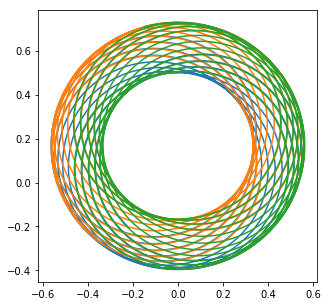

In [430]:
plt.figure(figsize=(5,5))
plt.plot(x_pos1,y_pos1)
plt.plot(x_pos2,y_pos2)
plt.plot(x_pos3,y_pos3)


#  Tracer on 45 degree with  x-axis along with three vortices on issoceles triangle

In [431]:
def RK2(x,v_j,v_j1,dt):
    x_j1 = x + dt*(v_j+v_j1)/2
    return x_j1

In [432]:
#initial positions
x1=x01=-0.5
y1=y01=0
x2=x02=0.5
y2=y02=0
x3=x03=0
y3=y03=0.5

xt = {}
yt = {}
for i in range(10):                              #initial positions for tracer's
    xt[i] = i
    
    yt[i] = i
#initial conditions

In [433]:
#arrays for storing coordinates of vortices and tracer's
x_pos1 = np.array([-0.5])
y_pos1 = np.array([0]) 
x_pos2 = np.array([0.5]) 
y_pos2 = np.array([0]) 
x_pos3 = np.array([0])
y_pos3 = np.array([math.sqrt(3)/2])
x_tracer = {}
y_tracer = {}
for i in range(10):
    x_tracer[i] = [i]
    y_tracer[i] = [i]


In [434]:
dt = 0.1
for t in range(0,10000,1):
    u1 = get_ux(1,x1,y1,x02,y02) + get_ux(1,x1,y1,x03,y03)        #vortex1: calcualtion of velocity
    v1 = get_uy(1,x1,y1,x02,y02) + get_uy(1,x1,y1,x03,y03)
    xj1 = euler(x1,u1,dt)                                       #calculation of xj+1 using euler
    yj1 = euler(y1,v1,dt)

    u2 = get_ux(1,x2,y2,x01,y01) + get_ux(1,x2,y2,x03,y03)       #vortex2: calcualtion of velocity
    v2 = get_uy(1,x2,y2,x01,y01) + get_uy(1,x2,y2,x03,y03)
    xj2 = euler(x2,u2,dt)
    yj2 = euler(y2,v2,dt)
    
    u3 = get_ux(1,x3,y3,x01,y01) + get_ux(1,x3,y3,x02,y02)        #vortex1: calcualtion of velocity
    v3 = get_uy(1,x3,y3,x01,y01) + get_uy(1,x3,y3,x02,y02)
    xj3 = euler(x3,u3,dt)                                       #calculation of xj+1 using euler
    yj3 = euler(y3,v3,dt)
    
    uj1 = get_ux(1,xj1,yj1,xj2,yj2) + get_ux(1,xj1,yj1,xj3,yj3)
    vj1 = get_uy(1,xj1,yj1,xj2,yj2) + get_uy(1,xj1,yj1,xj3,yj3)
    uj2 = get_ux(1,xj2,yj2,xj1,yj1) + get_ux(1,xj2,yj2,xj3,yj3)          #vJ+1 using euler for all vortices
    vj2 = get_uy(1,xj2,yj2,xj1,yj1) + get_uy(1,xj2,yj2,xj3,yj3)
    uj3 = get_ux(1,xj3,yj3,xj1,yj1) + get_ux(1,xj3,yj3,xj2,yj2)
    vj3 = get_uy(1,xj3,yj3,xj1,yj1) + get_uy(1,xj3,yj3,xj2,yj2)
    #tracer's 
    for i in range(10):
        #calulation of vj for all tracer's
        ut = get_ux(1,float(xt[i]),float(yt[i]),x02,y02) + get_ux(1,float(xt[i]),float(yt[i]),x03,y03) + get_ux(1,float(xt[i]),float(yt[i]),x01,y01)
        vt = get_uy(1,xt[i],yt[i],x02,y02) + get_uy(1,xt[i],yt[i],x03,y03) + get_uy(1,xt[i],yt[i],x01,y01)
        #calculation of xj+1 using euler
        xt1 = euler(xt[i],ut,dt)
        yt1 = euler(yt[i],vt,dt)
        #vj+1 using euler 
        ujt = get_ux(1,xt1,yt1,xj2,yj2) + get_ux(1,xt1,yt1,xj3,yj3) + get_ux(1,xt1,yt1,xj1,yj1)
        vjt = get_uy(1,xt1,yt1,xj2,yj2) + get_uy(1,xt1,yt1,xj3,yj3) + get_uy(1,xt1,yt1,xj1,yj1)
        
        #xj+1 using RK2
        xt[i] = RK2(xt[i],ut,ujt,dt)
        x_tracer[i].append(xt[i])           #upadate coordinates and store in array
        yt[i] = RK2(yt[i],vt,vjt,dt)
        y_tracer[i].append(yt[i])

        

    #xj+1 using RK2 and store coordinates
    x1 = RK2(x1,u1,uj1,dt)
    x_pos1 = np.append(x_pos1,x1)
    y1 = RK2(y1,v1,vj1,dt)
    y_pos1 = np.append(y_pos1,y1)
    
    x2 = RK2(x2,u2,uj2,dt)
    x_pos2 = np.append(x_pos2,x2)
    y2 = RK2(y2,v2,vj2,dt)
    y_pos2 = np.append(y_pos2,y2)
    
    x3 = RK2(x3,u3,uj3,dt)
    x_pos3 = np.append(x_pos3,x3)
    y3 = RK2(y3,v3,vj3,dt)
    y_pos3 = np.append(y_pos3,y3)
    
    
    
    
    x01=x1
    y01=y1
    x02=x2
    y02=y2
    x03=x3
    y03=y3

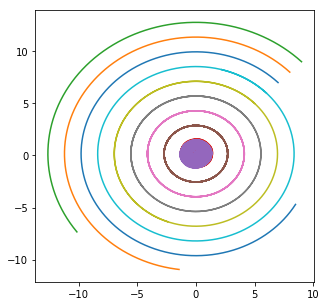

In [435]:
plt.figure(figsize=(5,5))
plt.plot(x_pos1,y_pos1)
plt.plot(x_pos2,y_pos2)
plt.plot(x_pos3,y_pos3)
for i in range(10):
    plt.plot(x_tracer[i],y_tracer[i])

# Error Analysis for RK2

In [436]:
def RK2(x,v_j,v_j1,dt):
    x_j1 = x + dt*(v_j+v_j1)/2                 #xj+1 = xj + (vj+v(j+1))*dt/2
    return x_j1
def euler(x,v,dt):
    x1 = x + v*dt
    return x1                     #dt is timestep

In [437]:
x1=x01=xideal=0.5
y1=y01=yideal=0
x2=x02=xideal2=-0.5
y2=y02=yideal2=0

In [438]:
delta_t = []                            #storing different dt
time_period = 2*((math.pi)**2)
error = []                                 #storing different error values for diff dt
def error_cal(x01,y01,x1,y1):
    error = math.sqrt((x01-x1)**2+(y01-y1)**2)
    return error
time_period

19.739208802178716

In [439]:
for i in range(5000,20000,1000):
    dt = time_period/i
    delta_t.append(dt)
    for t in range(0,i,1):
        #vortex1
        u1 = get_ux(1,x1,y1,x02,y02)                #velocities at initial positions
        v1 = get_uy(1,x1,y1,x02,y02)
        xj1 = euler(x1,u1,dt)                     #x_j+1 coordiante using euler
        yj1 = euler(y1,v1,dt)

        #vortex2
        u2 = get_ux(1,x2,y2,x01,y01)
        v2 = get_uy(1,x2,y2,x01,y01)
        xj2 = euler(x2,u2,dt)
        yj2 = euler(y2,v2,dt)

        uj1 = get_ux(1,xj1,yj1,xj2,yj2)             #v_j+1 using euler
        vj1 = get_uy(1,xj1,yj1,xj2,yj2)
        uj2 = get_ux(1,xj2,yj2,xj1,yj1)
        vj2 = get_uy(1,xj2,yj2,xj1,yj1)

        
        x1 = RK2(x1,u1,uj1,dt)                        #coordinates after dt time using RK2
        #x_pos1 = np.append(x_pos1,x1)
        y1 = RK2(y1,v1,vj1,dt)
        #y_pos1 = np.append(y_pos1,y1)

        x2 = RK2(x2,u2,uj2,dt)
        #x_pos2 = np.append(x_pos2,x2)
        y2 = RK2(y2,v2,vj2,dt)
        #y_pos2 = np.append(y_pos2,y2)

        x01=x1
        y01=y1
        x02=x2
        y02=y2
    
    e1 = error_cal(xideal,yideal,x1,y1)                      #error calculation after one cycle
    error.append(e1)


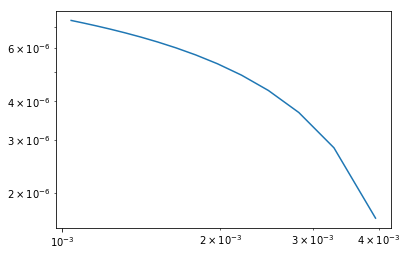

In [440]:
plt.loglog(delta_t,error)

# Error for equilateral traingle

In [441]:
#initial positions
x1=x01=xideal=-0.5
y1=y01=yideal=0
x2=x02=xideal2=0.5
y2=y02=yideal2=0
x3=x03=0
y3=y03=(math.sqrt(3)/2)

In [442]:
delta_t = []
time_period = 2*((math.pi)**2)/3
error = []
def error_cal(x01,y01,x1,y1):
    error = math.sqrt((x01-x1)**2+(y01-y1)**2)
    return error
time_period

6.579736267392906

In [443]:
for i in range(5000,20000,1000):
    dt = time_period/i
    delta_t.append(dt)
    for t in range(0,i,1):
        
        u1 = get_ux(1,x1,y1,x02,y02) + get_ux(1,x1,y1,x03,y03)    #vortex1: calcualtion of velocity(vj)
        v1 = get_uy(1,x1,y1,x02,y02) + get_uy(1,x1,y1,x03,y03)
        xj1 = euler(x1,u1,dt)                                     #calculation of xj+1 using euler
        yj1 = euler(y1,v1,dt)

        u2 = get_ux(1,x2,y2,x01,y01) + get_ux(1,x2,y2,x03,y03)     #vortex2: calcualtion of velocity(vj)
        v2 = get_uy(1,x2,y2,x01,y01) + get_uy(1,x2,y2,x03,y03)
        xj2 = euler(x2,u2,dt)                                       #calculation of xj+1 using euler
        yj2 = euler(y2,v2,dt)

        u3 = get_ux(1,x3,y3,x01,y01) + get_ux(1,x3,y3,x02,y02)     #vortex3: calcualtion of velocity(vj)
        v3 = get_uy(1,x3,y3,x01,y01) + get_uy(1,x3,y3,x02,y02)
        xj3 = euler(x3,u3,dt)                                       #calculation of xj+1 using euler
        yj3 = euler(y3,v3,dt)

        uj1 = get_ux(1,xj1,yj1,xj2,yj2) + get_ux(1,xj1,yj1,xj3,yj3)
        vj1 = get_uy(1,xj1,yj1,xj2,yj2) + get_uy(1,xj1,yj1,xj3,yj3)
        uj2 = get_ux(1,xj2,yj2,xj1,yj1) + get_ux(1,xj2,yj2,xj3,yj3)    #vJ+1 using euler for all vortices
        vj2 = get_uy(1,xj2,yj2,xj1,yj1) + get_uy(1,xj2,yj2,xj3,yj3)
        uj3 = get_ux(1,xj3,yj3,xj1,yj1) + get_ux(1,xj3,yj3,xj2,yj2)
        vj3 = get_uy(1,xj3,yj3,xj1,yj1) + get_uy(1,xj3,yj3,xj2,yj2)

        #xj+1 using RK2 and store coordinates
        x1 = RK2(x1,u1,uj1,dt)
        #x_pos1 = np.append(x_pos1,x1)
        y1 = RK2(y1,v1,vj1,dt)
        #y_pos1 = np.append(y_pos1,y1)

        x2 = RK2(x2,u2,uj2,dt)
        #x_pos2 = np.append(x_pos2,x2)
        y2 = RK2(y2,v2,vj2,dt)
        #y_pos2 = np.append(y_pos2,y2)

        x3 = RK2(x3,u3,uj3,dt)
        #x_pos3 = np.append(x_pos3,x3)
        y3 = RK2(y3,v3,vj3,dt)
        #y_pos3 = np.append(y_pos3,y3)


        x01=x1
        y01=y1
        x02=x2
        y02=y2
        x03=x3
        y03=y3
    
    e1 = error_cal(xideal2,yideal2,x2,y2)
    error.append(e1)
    

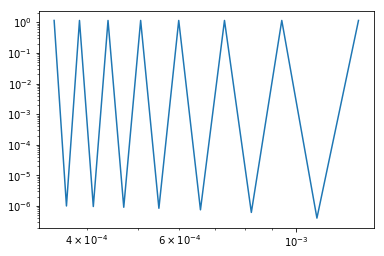

In [444]:
plt.loglog(delta_t,error)